In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_lowercase
from PIL import Image
from pprint import pprint
from tqdm import tqdm

In [2]:
files = []
for s in ascii_lowercase[:6]:
    files.append("{}.txt".format(s))
print(files)

['a.txt', 'b.txt', 'c.txt', 'd.txt', 'e.txt', 'f.txt']


In [31]:
# Read the input
# office has -1 for #
#            -2 for devs
#            -3 for managers
EMPTY = -1
DEV = -2
MANAGER = -3 
def read_input(filename):
    with open(filename, 'r') as f:
        w, h = [int(x) for x in f.readline().split()]
        office_c = []
        for i in range(h):
            office_c.append(f.readline())
        office = []
        for i in range(len(office_c)):
            office.append([])
            for j in range(len(office_c[i])):
                if office_c[i][j] == '#':
                    office[i].append(-1)
                if office_c[i][j] == '_':
                    office[i].append(-2)
                if office_c[i][j] == 'M':
                    office[i].append(-3)
        d = int(f.readline())
        devs = []
        for i in range(d):
            line = f.readline()
            devs.append({
                "company": line.split()[0],
                "bonus": int(line.split()[1]),
                "skills": set([x for x in line.split()[3:]]),
                "id": i
                })
        pm = int(f.readline())
        managers = []
        for i in range(pm):
            line = f.readline()
            managers.append({
                "company": line.split()[0],
                "bonus": int(line.split()[1]),
                "id": i
                })
        return office, devs, managers

In [11]:
# Analysis for the offices:
for filename in files:
    office, devs, managers = read_input(filename)
    image = Image.new("RGB", (len(office), len(office[0])), "white")
    pixels = image.load()
    for i in range(len(office)):
        for j in range(len(office[i])):
            if office[i][j] == '#':
                pixels[i, j] = (0,0,0)  
            elif office[i][j] == '_':
                pixels[i, j] = (0,255,0)  
            else:
                pixels[i, j] = (0,0,255)  
    image.show()

4 10


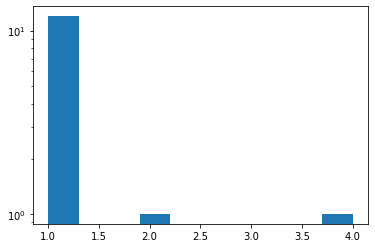

6798 6836


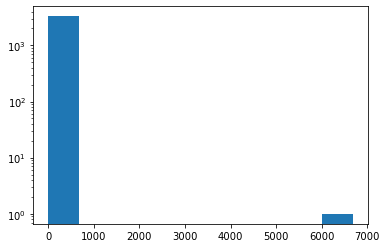

7256 7588


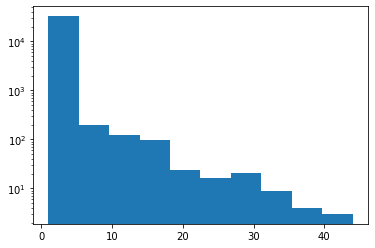

29800 30114


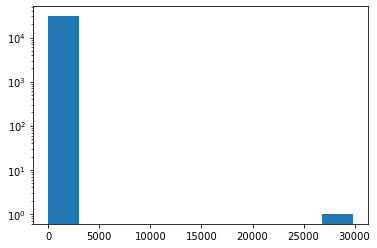

35569 38165


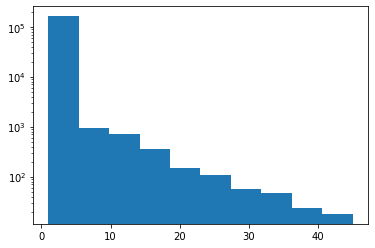

73320 77271


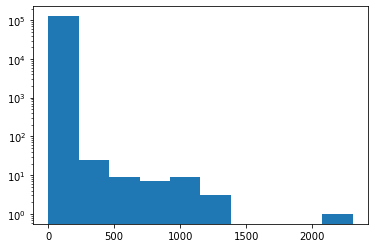

In [19]:
for filename in files:
    office, devs, managers = read_input(filename)
    visited = np.zeros((len(office), len(office[0])))
    developers_spots = 0
    ccs = []
    for i in range(len(office)):
        for j in range(len(office[i])):
            if office[i][j] == '_':
                developers_spots += 1
            if visited[i, j] == 0:
                ccs.append(0)
                q = [(i,j)]
                visited[i, j] = 1
                while len(q) != 0:
                    y, x= q[-1]
                    q.pop()
                    visited[y,x] = 1
                    ccs[-1] += 1
                    for l in range(-1, 2):
                        for k in range(-1, 2):
                            if l == 0 or k == 0:
                                if l + y >= 0 and l+y < len(office) and x+k >= 0 and x+k < len(office[0]):
                                    if visited[l+y, x+k] == 0 and office[l+y][x+k] == '_':
                                        visited[l+y, x+k] = 1
                                        q.append((l+y, x+k))
    print(developers_spots, len(devs))
    plt.hist(np.array(ccs))
    plt.yscale('log')

    plt.show()

In [4]:
for filename in files:
    office, devs, managers = read_input(filename)
    df_devs = pd.DataFrame(devs)
    df_managers = pd.DataFrame(managers)
    print(filename)
    print("#Developers: {}".format(len(df_devs)))
    print("Max devs per company: {}".format(
        df_devs.groupby('company').count().max()['bonus']
    ))
    print("# companies: {}".format(len(df_devs['company'].unique())))
    print("avg bonus: {} +- {}".format(df_devs['bonus'].mean(), df_devs['bonus'].std()))
    print("avg skills: {} +- {}".format(df_devs['skills'].apply(lambda x: len(x)).mean(), 
                                       df_devs['skills'].apply(lambda x: len(x)).std()))
    print("#Managers: {}".format(len(df_managers)))
    print("# Companies: {}".format(len(df_managers['company'].unique())))
    print("avg bonus: {} +- {}".format(df_managers['bonus'].mean(), df_managers['bonus'].std()))

a.txt
#Developers: 10
Max devs per company: 3
# companies: 5
avg bonus: 4.2 +- 2.4404006956964173
avg skills: 2.6 +- 0.8432740427115678
#Managers: 3
# Companies: 3
avg bonus: 2.6666666666666665 +- 2.081665999466133
b.txt
#Developers: 6836
Max devs per company: 90
# companies: 100
avg bonus: 10.515359859566999 +- 2.2992440860400762
avg skills: 14.95655354008192 +- 3.155332370822301
#Managers: 1207
# Companies: 100
avg bonus: 17.897265948632974 +- 6.398023960180999
c.txt
#Developers: 7588
Max devs per company: 89
# companies: 120
avg bonus: 5.0 +- 0.0
avg skills: 9.628887717448603 +- 6.870154129920177
#Managers: 1242
# Companies: 120
avg bonus: 5.0 +- 0.0
d.txt
#Developers: 30114
Max devs per company: 108
# companies: 350
avg bonus: 10.444876137344757 +- 2.409639498790193
avg skills: 15.010792322507804 +- 3.165728063881842
#Managers: 5049
# Companies: 350
avg bonus: 17.491186373539314 +- 6.443553791063172
e.txt
#Developers: 38165
Max devs per company: 90
# companies: 600
avg bonus: 5.130

In [163]:
def compute_points(x, manager=False):
    if not manager:
        len_inter = len(x.skills_x.intersection(x.skills_y))
        len_union = len(x.skills_x.union(x.skills_y))
    else:
        len_inter = 0
        len_union = 0
    return len_inter * (len_union - len_inter) + x.bonus_x * x.bonus_y

In [21]:
for filename in files:
    office, devs, managers = read_input(filename)
    df_devs = pd.DataFrame(devs)
    df_managers = pd.DataFrame(managers)
    df_devs_merged = df_devs.merge(df_devs, left_on='company', right_on='company')
    df_devs_merged = df_devs_merged[df_devs_merged.id_x < df_devs_merged.id_y]
    df_devs_merged['points'] = df_devs_merged.apply(lambda x: compute_points(x), axis=1)
    print(len(df_devs_merged))
    print(df_devs_merged[:20])

NameError: name 'compute_points' is not defined

In [168]:
filename = files[1]
office, devs, managers = read_input(filename)
df_devs = pd.DataFrame(devs)
df_devs['x'] = np.array([-1 for i in range(len(df_devs))])
df_devs['y'] = np.array([-1 for i in range(len(df_devs))])
df_managers = pd.DataFrame(managers)
df_managers['x'] = np.array([-1 for i in range(len(df_managers))])
df_managers['y'] = np.array([-1 for i in range(len(df_managers))])
df_devs_merged = df_devs.merge(df_devs, left_on='company', right_on='company')
df_devs_merged = df_devs_merged[df_devs_merged.id_x < df_devs_merged.id_y]
df_devs_merged['points'] = df_devs_merged.apply(lambda x: compute_points(x), axis=1)
df_devs_merged = df_devs_merged.drop(columns=['bonus_x', 'company','x_x', 'y_x', 'bonus_y', "x_y", 'y_y'])
df_managers_merged = df_managers.merge(df_managers, left_on='company', right_on='company')
df_managers_merged = df_managers_merged[df_managers_merged.id_x < df_managers_merged.id_y]
df_managers_merged['points'] = df_managers_merged.apply(lambda x: compute_points(x, True), axis=1)

In [174]:
def computeAssignments(office, merged_df, df, deskType):
    for i in tqdm(range(len(office))):
        for j in range(len(office[i])):
            if office[i][j] == deskType:
                best_score = 0
                best_dev = None
                for k in range(-1, 2):
                    for l in range(-1, 2):
                        if (k == 0 or l == 0) and (k!=0 or l!=0):
                            if i+k>=0 and i+k<len(office) and j+l>=0 and j+l<len(office[i]):
                                if office[i+k][j+l] >= 0:
                                    # There is an employee
                                    tmp = merged_df[
                                        (merged_df['id_x']==office[i+k][j+l]) | 
                                        (merged_df['id_y']==office[i+k][j+l])].merge(
                                            df, 
                                            left_on='id_x', 
                                            right_on='id', 
                                            suffixes=('_left', '_right')).merge(
                                        df, left_on='id_y', right_on='id', suffixes=('_0', '_1'))
                                    tmp = tmp[(tmp['x_0']==-1) | (tmp['x_1']==-1)]
                                    if len(tmp) > 0:
                                        tmp = tmp.sort_values('points', ascending=False).iloc[0]
                                        p = tmp['points']
                                        dev = tmp['id_x'] if tmp['id_x'] != office[i+k][j+l] else tmp['id_y']
                                        if p > best_score:
                                            best_score = p
                                            best_dev = dev
                if best_dev != None:
                    office[i][j] = best_dev
                    df.loc[best_dev, 'x'] = j
                    df.loc[best_dev, 'y'] = i
                else:
                    random_row = df[df['x']==-1].sample(1).iloc[0]
                    office[i][j] = random_row['id']
                    df.loc[random_row['id'], 'x'] = j
                    df.loc[random_row['id'], 'y'] = i
                #pprint(office)

In [170]:
computeAssignments(office, df_devs_merged, df_devs, DEV)

100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


In [173]:
computeAssignments(office, df_managers_merged, df_managers, MANAGER)

TypeError: computeAssignments() takes 3 positional arguments but 4 were given

In [172]:
def print_output(df_devs, df_managers, outfile):
    print(df_devs)
    print(df_managers)
    with open(outfile, 'w') as f:
        for i, l in df_devs.iterrows():
            if l.x == -1:
                print("X", file=f)
            else:
                print("{} {}".format(l.x, l.y), file=f)
        for i, l in df_managers.iterrows():
            if l.x == -1:
                print("X", file=f)
            else:
                print("{} {}".format(l.x, l.y), file=f)
print_output(df_devs, df_managers, "{}.out".format(filename.split('.')[0]))

     company  bonus                                             skills    id  \
0     ccf1bb      9  {s05oss, s18745, sk2ggc, suiohy, s47grn, szpsx...     0   
1     cv3f6j      9  {sz34ji, s3p9aw, scq7ky, s30ejt, skx8ur, sbfpo...     1   
2     c5lvo1      8  {sqrgm3, sqf44i, s18745, sk2ggc, spgxtp, sye8x...     2   
3     c2rf54      9  {s05oss, sqf44i, s0azdu, sd61kw, sye8x8, szpsx...     3   
4     c7vpb1     13  {sqrgm3, sqf44i, sk2ggc, suiohy, sd61kw, svrtw...     4   
...      ...    ...                                                ...   ...   
6831  c7lfl5     14  {sqrgm3, sqf44i, sk2ggc, spgxtp, sye8x8, sd61k...  6831   
6832  cnb5vt     13  {sgwweq, sz34ji, sqit8w, sogq71, s3p9aw, savka...  6832   
6833  cy8hnj     13  {sdiy8s, sgwweq, sqit8w, sa0v8w, s3p9aw, sogq7...  6833   
6834  c2rf54     12  {sqrgm3, s18745, s0azdu, szpsx1, s2eqln, sf1vt...  6834   
6835  ccpzg8     11  {sdiy8s, s05oss, s0azdu, sogq71, spgxtp, sf7u7...  6835   

       x   y  
0     44  31  
1     69 